#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns
from pandas_profiling import ProfileReport 
import sweetviz

#### We begin with data preparation

In [2]:
#Read file
df = pd.read_csv("data/remaining_behavior_ext.csv")

#Rename columns according to our preference
df.rename(
    columns={"inter_api_access_duration(sec)": "access_duration", "api_access_uniqueness": "access_uniqueness",
             "sequence_length(count)": "session_calls", "vsession_duration(min)": "session_duration" }, 
    inplace=True
)

#Pop useless columns for our intention
df.pop("ip_type")
df.pop("behavior")
df.pop("num_sessions")
df.pop("num_unique_apis")
df.pop("source")

#we remove unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


print(df.head())

#We assign a nuemrical value to behavior_type column
df["behavior_type"].replace({"attack": 1, "bot": 2, "normal": 3, "outlier": 4}, inplace=True)

#We transform minutes to seconds in order to normalize the DF
df["session_duration"] = 60 * df["session_duration"]

   access_duration  access_uniqueness  session_calls  session_duration  \
0         7.010387           0.419355           31.0             13040   
1        51.419393           0.252336          107.0            330113   
2        25.860775           0.275000           40.0             62066   
3         0.205909           0.818182           11.0               136   
4         0.122125           0.812500           16.0               118   

  behavior_type  num_users  
0       outlier        1.0  
1       outlier        1.0  
2       outlier        1.0  
3       outlier        1.0  
4       outlier        1.0  


#### Create a profile dashboard using "sweetviz"

In [3]:
df_profile = ProfileReport(
    df, 
    explorative=True,
    title='Reporte de comportamiento', 
    html={'style':{'full_width':False}}
) 

df_profile.to_file("Pandas_profile.html")

B_profile = sweetviz.analyze(df)
B_profile.show_html("Pandas_profile.html")


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)

Report Pandas_profile.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Basic information for the columns of the dataframe
Write anlysis here!!!
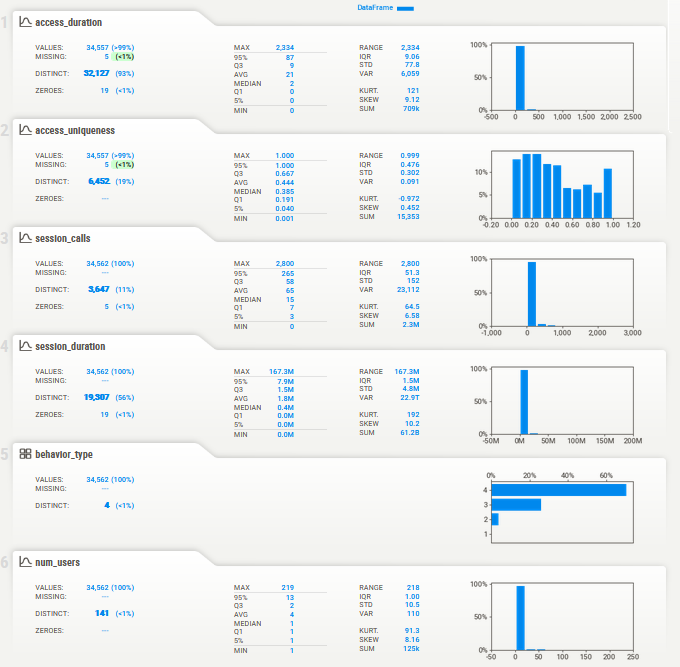

#### Correlation table
Write anlysis here!!!
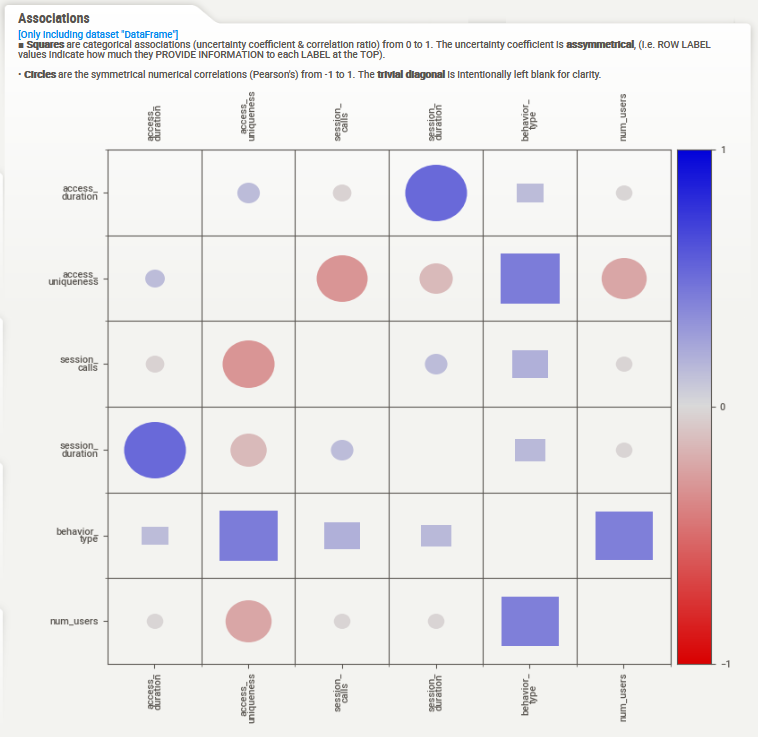

#### We want to detect the anomalies between the time lapse a user makes on each API call.
###### Questions to ask
What is the average time between API calls a user makes?

In [4]:
print(df['access_duration'].describe())

count    34557.000000
mean        20.503248
std         77.836489
min          0.000000
25%          0.372385
50%          2.185226
75%          9.435875
max       2333.627333
Name: access_duration, dtype: float64


##### We procede to analyse the data profile

Se comienza con el entrenamiento de la información

#list(df.columns)
#sns.heatmap(df, annot=True)
#df['inter_access'] = df.iloc[:,[2]]
#print(df['inter_access'].mean)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))


# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()

   access_duration  session_calls  session_duration  behavior_type  num_users
0         7.010387           31.0            782400              4        1.0
1        51.419393          107.0          19806780              4        1.0
2        25.860775           40.0           3723960              4        1.0
3         0.205909           11.0              8160              4        1.0
4         0.122125           16.0              7080              4        1.0


C:\Users\CAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: could not convert string to float: 'session_calls'

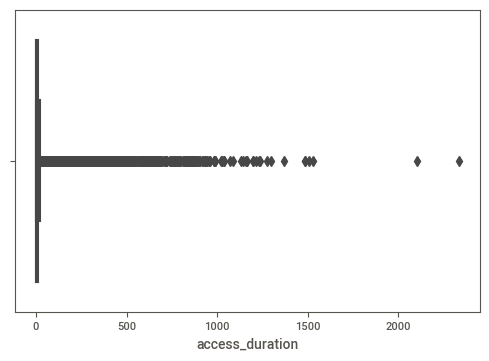

In [13]:
#list(df.columns)
#sns.heatmap(df, annot=True)
#df['inter_access'] = df.iloc[:,[2]]
#print(df['inter_access'].mean)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


sns.boxplot(df.access_duration)

rng = np.random.RandomState(42)
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.replace("", np.nan, regex=False)

# Generate train data
X = 0.3 * rng.randn(100, 2)
df.replace('', 0, inplace=True)
#df.pop("access_uniqueness")

#X_train = df[["access_duration","behavior_type"]]
#pd.to_numeric(df[["access_duration",""]],downcast="float")
print(df.head(5))

#pd.to_numeric(df[1:3],downcast="float")


X_train=df.columns[1:2]

# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=20, edgecolor="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="green", s=20, edgecolor="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", s=20, edgecolor="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left",
)
plt.show()